In [1]:
# All important libraries goes here!
import pandas as pd

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Data Frame and removing colums
dataframe = pd.read_csv('./Data/washedData.csv')
dataframe = dataframe.drop(columns='ID')

#### Problem Statement
We are trying to understand the factors that influence whether a company has affected employees. This is important because companies with affected employees may require additional support or interventions. By identifying the key factors, we can target our interventions more effectively and potentially prevent employees from being affected in the future.

To solve this problem, we will use this dataset to build a predictive model. This model will take as input the various financial and operational characteristics of a company and output a prediction of whether the company has affected employees. We can then use this model to predict the status of new companies and guide our interventions.


<br>
<br>

#### (a) Data cleaning

* Handling duplicate values.
* Dealing with missing/null values.
* Addressing inconsistent data.

We will go through every column

<br>

#### (a) (ii) looking if there are missing values in each column of the dataframe

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   No of employee     4137 non-null   int64 
 1   Annual turnover    4129 non-null   object
 2   TCTC               4123 non-null   object
 3   Basic Salary       4135 non-null   object
 4   Cash Injection     4137 non-null   int64 
 5   Contrib Waiver     4137 non-null   int64 
 6   Affected Employee  4137 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 226.4+ KB


From the results it shows that there arent any missing values, since the total entries = Not-Null Count of 4137

<br>

#### (a) (iii) Checking for duplicate rows

In [5]:
dataframe.duplicated().sum()

1075

There are 1075 duplicates in the dataset, Those will be removed

In [6]:
dataframe.drop_duplicates(inplace=True)
dataframe.duplicated().sum()

0

<br>

#### (a) (iv) Ensuring data consistency and removing null values

These attributes may contain some inconsistencies, for the datatype has to be an integer.

 2.   Annual turnover    4129 non-null   object
 3.   TCTC               4123 non-null   object
 4.  Basic Salary       4135 non-null   object

In [7]:
dataframe['Annual turnover'] = pd.to_numeric(dataframe['Annual turnover'], errors='coerce')
dataframe['TCTC'] = pd.to_numeric(dataframe['TCTC'], errors='coerce')
dataframe['Basic Salary'] = pd.to_numeric(dataframe['Basic Salary'], errors='coerce')

dataframe.dropna(inplace=True)

dataframe.head(5)

,No of employee,Annual turnover,TCTC,Basic Salary,Cash Injection,Contrib Waiver,Affected Employee
0,63,3098000000.00,13782989.04,9500520.21,0,1,0
1,73,15000000.00,326574.61,992400.00,1,1,1
2,18,0.00,543629.21,397789.63,0,1,1
3,25,52000000.00,725607.67,496910.00,0,1,1
4,1,765270.60,205385.34,31530.00,0,0,0


<br>

##### (a) (v) Removing outliers

In [8]:
def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    return dataframe

# Apply the function to the columns with outliers
for column in ['No of employee', 'Annual turnover', 'TCTC', 'Basic Salary']:
    dataframe = remove_outliers(dataframe, column)

# Save the cleaned data to a CSV file
dataframe.to_csv('./Data/cleaned-data.csv', index=False)

<br>
<br>

#### (b) Statistical Analysis

In [9]:
dataframe.describe()

,No of employee,Annual turnover,TCTC,Basic Salary,Cash Injection,Contrib Waiver,Affected Employee
count,1584.00,1584.00,1584.00,1584.00,1584.00,1584.00,1584.00
mean,5.47,525426.92,19281.95,14758.83,0.71,0.70,0.91
std,5.89,1035349.32,27751.99,18020.23,0.45,0.46,0.29
min,1.00,-3000000.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,9600.00,300.00,2000.00,0.00,0.00,1.00
50%,3.00,80000.00,6820.00,6514.25,1.00,1.00,1.00
75%,7.00,480000.00,27380.38,21250.00,1.00,1.00,1.00
max,26.00,6100000.00,153192.00,75800.00,1.00,1.00,1.00


**Number of Employees**

- We looked at a total of 2,673 businesses in Namibia.
- On average, each business had about 13 employees.
- However, this number varied a lot.
- Some businesses had just one employee, while the largest had 1,488.


**Annual Turnover (Revenue)**

- We examined the money these businesses made in a year.
- On average, a business in Namibia earned around 10.3 million Namibian Dollars each year.
- However, this also had a big range.
- Some businesses had negative turnover, meaning they didn't earn anything.
- The highest-earning business brought in a whopping 3.4 billion Namibian Dollars.


**Total Compensation for Employees**

- We looked at how much these businesses paid their employees in total.
- On average, each employee received about 716,797 Namibian Dollars annually.
- Again, this varied widely.
- Some employees received no compensation, while the highest-earning employee got 907.2 million Namibian Dollars.


**Basic Salary**

- This is the regular salary employees receive.
- On average, an employee's basic salary was around 556,099 Namibian Dollars.
- But this also had a big range, from zero (some employees didn't get a basic salary) to 585.5 million Namibian Dollars.


**Cash Injection**

- This shows whether these businesses received extra cash or financial support.
- On average, businesses got this support about 71% of the time.


**Contribution Waiver**

- This tells us if these businesses waived certain contributions.
- On average, businesses applied these waivers about 70% of the time.


**Affected Employees**

- This is about whether employees were affected by certain conditions or changes in the business.
- On average, about 89% of businesses reported that their employees were affected by these conditions.


<br>
<br>

#### Exploratory Data Analysis (EDA)

* Histograms of "Annual turnover" and "Basic Salary."
* Box plots of "TCTC" to identify outliers.
* Scatter plots to explore relationships between variables.

Interpret the insights gained from each visualization.

array([[<Axes: title={'center': 'No of employee'}>,
        <Axes: title={'center': 'Annual turnover'}>,
        <Axes: title={'center': 'TCTC'}>],
       [<Axes: title={'center': 'Basic Salary'}>,
        <Axes: title={'center': 'Cash Injection'}>,
        <Axes: title={'center': 'Contrib Waiver'}>],
       [<Axes: title={'center': 'Affected Employee'}>, <Axes: >,
        <Axes: >]], dtype=object)

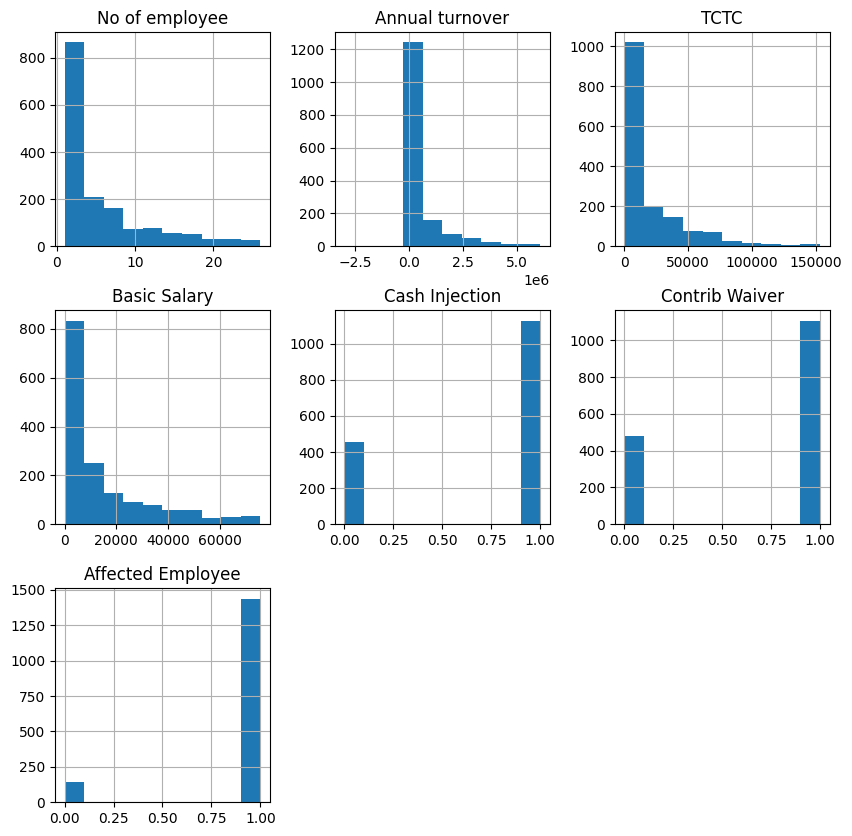

In [10]:
# Code goes here!
# Ever exploration is to be done on an individual block.
# With a markdown to explain the Exploration
clean_data = pd.read_csv('./data/cleaned-data.csv')
clean_data.hist(figsize=(10,10))

<br>
<br>

#### Machine Learning

##### Predictive Modeling for Annual Turnover

Using **Annual Turnover** as the target variable (what you want to predict) and use other features as predictors.

* No of Employees
* TCTC
* Basic Salary
* Cash Injection
* Contrib Waiver

we can use regression algorithms like linear regression, decision trees, or random forests to build the model.

<br>

##### Employee Classification

We can use machine learning to classify employees into different categories based

* Cash Injection
* Contrib Waiver
* Affected Employee

We might want to classify employees into **Highly Affected** and **Less Affected** categories.
We can use classification algorithms like logistic regression, decision trees, or support vector machines.

<br>

##### Employee Segmentation

Clustering techniques like K-means clustering can be used to segment employees based on their characteristics.

We can use features like:

* No of Employees
* TCTC
* Basic Salary

To create meaningful clusters

In [11]:
# Code goes here!

<br>
<br>

#### Evaluation of Machine Learning

Present performance metrics (e.g., Mean Absolute Error, R-squared) for each algorithm used.

Explain what the results mean:

* Which algorithm performed better?
* How accurate is the prediction of turnover?

<br>
<br>

#### Presentation of Results

Summarize key findings:

* Trends in employee turnover.
* Compensation fairness insights.

Mention any actionable recommendations based on the analysis.